In [109]:
import warnings
warnings.filterwarnings('ignore')

## import - 문제 발생 여지

In [1]:
from bs4 import BeautifulSoup
import re
import pandas as pd
import requests
from datetime import datetime
import urllib
import requests as rq

# 오류나면 얘때문
import urllib.request as ulq


# BeautifulSoup 모듈

- BeautifulSoup 모듈
    - 홈페이지 내 데이터를 쉽게 추출할 수 있게 해주는 파이썬 외부 라이브러리
    - 웹 문서 내 수많은 HTML 태그들을 parser를 활용해 사용하기 편한 파이썬 객체로 만들어 제공
    - 웹 문서 구조를 알고 있다면 편하게 데이터를 뽑아 활용할 수 있음

- 기존방식과의 차이점
    - 정규 표현식, 문자열 함수 등을 활용하여 홈페이지 텍스트 내 패턴을 분석하여 하나씩 원하는 데이터를 찾아가는 형식
    - BS는 HTML 문서를 태그를 기반으로 구조화하여 태그로 원하는 데이터를 찾아가는 형식

## .prettify(), .next_sibling

In [110]:
html_doc = """
<html lang="en">
<head><title>crawl</title></head>
<body>
<p class="a" align="center"> text1</p>
<p class="b" align="center"> text2</p>
<p class="c" align="center"> text3</p>
<div><img src="/source" width="300" height="200"></div>
</body>
</html>
"""
soup = BeautifulSoup(html_doc, 'html.parser')
print(soup.prettify())

<html lang="en">
 <head>
  <title>
   crawl
  </title>
 </head>
 <body>
  <p align="center" class="a">
   text1
  </p>
  <p align="center" class="b">
   text2
  </p>
  <p align="center" class="c">
   text3
  </p>
  <div>
   <img height="200" src="/source" width="300"/>
  </div>
 </body>
</html>



In [111]:
html = """
<html><body>
  <h1>스크레이핑이란?</h1>
  <p>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body></html>
"""

In [112]:
soup = BeautifulSoup(html, 'html.parser')
h1 = soup.html.body.h1

print(h1.string)

스크레이핑이란?


In [113]:
p1 = soup.html.body.p

In [114]:
p1.string

'웹 페이지를 분석하는 것'

In [115]:
p2 = p1.next_sibling.next_sibling
p2.string

'원하는 부분을 추출하는 것'

In [116]:
p3 = p1.next_sibling
p3.string

'\n'

## find() find_all()

find() : HTML의 해당 태그에 대한 첫 번째 정보를 가져옴
- find(속성='값') : HTML 해당 속성과 일치하는 값에 대한 첫 번째 정보를 가져옴

find_all() : 
- HTML의 해당 태그에 대한 모든 정보를 리스트 형식으로 가져옴. limit 옵션으로 개수 지정 가능
- CSS 속성으로 필터링(class_로 클래스를 직접 사용 혹은 attrs에서 속성 = 값으로 필터링)

In [117]:
html = """
<html><body>
  <h1 id="title">스크레이핑이란?</h1>
  <p id="body">웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body></html>
"""

In [118]:
soup = BeautifulSoup(html, 'html.parser')
title = soup.find(id="title")
body = soup.find(id="body")

print(title.string)
print(body.string)

스크레이핑이란?
웹 페이지를 분석하는 것


In [119]:
type(title.text), title.text

(str, '스크레이핑이란?')

In [120]:
type(title.string), title.string

(bs4.element.NavigableString, '스크레이핑이란?')

In [121]:
body.get_text(), type(body.get_text())

('웹 페이지를 분석하는 것', str)

In [122]:
texts = soup.findAll('p')
texts

[<p id="body">웹 페이지를 분석하는 것</p>, <p>원하는 부분을 추출하는 것</p>]

In [123]:
for t in texts:
    print(t.text)

웹 페이지를 분석하는 것
원하는 부분을 추출하는 것


In [124]:
texts = soup.find_all('p')
texts

[<p id="body">웹 페이지를 분석하는 것</p>, <p>원하는 부분을 추출하는 것</p>]

In [125]:
for t in texts:
    print(t.text)

웹 페이지를 분석하는 것
원하는 부분을 추출하는 것


In [127]:
url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"

In [128]:
res = req.urlopen(url)

In [129]:
soup = BeautifulSoup(res, 'html.parser')

In [130]:
type(soup)

bs4.BeautifulSoup

In [131]:
title = soup.find('title').string
wf = soup.find('wf').string
print(title, '\n')
print(wf)

기상청 육상 중기예보 

○ (강수) 30일(토)은 전라권에 소나기가 오는 곳이 있겠고, 8월 1일(월)부터 2일(화) 오전 사이 제주도에 비가 오겠습니다. <br />○ (기온) 이번 예보기간 아침 기온은 23~26도, 낮 기온은 30~34도로 어제(25일, 아침최저기온 22~26도, 낮최고기온 29~36도)와 비슷하겠습니다.<br />○ (주말전망) 30일(토)은 가끔 구름많고 전라권에는 오후에 소나기가 오는 곳이 있겠고, 31일(일)은 가끔 구름많겠습니다. <br />              아침 기온은 24~26도, 낮 기온은 31~34도가 되겠습니다.<br /><br />* 이번 예보기간 우리나라 주변 기압계에 따라 비 또는 소나기가 내리는 구역이 변동될 수 있으며, 강한 소나기가 내리는 지역에서는 돌풍과 함께 천둥.번개가 치는 곳이 있겠으니 안전에 유의하기 바라며, 앞으로 발표되는 기상정보를 참고하기 바랍니다.


In [132]:
type(wf), '왜 Nav어쩌고스트링이 아니고 이게 나오지 뭐가 다르지'

(bs4.element.CData, '왜 Nav어쩌고스트링이 아니고 이게 나오지 뭐가 다르지')

In [133]:
import requests, re

url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"

In [134]:
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')

In [135]:
wf = soup.find('wf').string

In [136]:
wf1 = re.sub('[^0-9가-힣]', ' ', wf)
wf1

'   강수  30일 토 은 전라권에 소나기가 오는 곳이 있겠고  8월 1일 월 부터 2일 화  오전 사이 제주도에 비가 오겠습니다           기온  이번 예보기간 아침 기온은 23 26도  낮 기온은 30 34도로 어제 25일  아침최저기온 22 26도  낮최고기온 29 36도 와 비슷하겠습니다          주말전망  30일 토 은 가끔 구름많고 전라권에는 오후에 소나기가 오는 곳이 있겠고  31일 일 은 가끔 구름많겠습니다                      아침 기온은 24 26도  낮 기온은 31 34도가 되겠습니다               이번 예보기간 우리나라 주변 기압계에 따라 비 또는 소나기가 내리는 구역이 변동될 수 있으며  강한 소나기가 내리는 지역에서는 돌풍과 함께 천둥 번개가 치는 곳이 있겠으니 안전에 유의하기 바라며  앞으로 발표되는 기상정보를 참고하기 바랍니다 '

### 과제0722_2

- wf를 위와 같은 형식으로 출력, 정규표현식 사용

In [138]:
url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"

data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
wf = soup.find('wf').string
print(wf)

○ (강수) 30일(토)은 전라권에 소나기가 오는 곳이 있겠고, 8월 1일(월)부터 2일(화) 오전 사이 제주도에 비가 오겠습니다. <br />○ (기온) 이번 예보기간 아침 기온은 23~26도, 낮 기온은 30~34도로 어제(25일, 아침최저기온 22~26도, 낮최고기온 29~36도)와 비슷하겠습니다.<br />○ (주말전망) 30일(토)은 가끔 구름많고 전라권에는 오후에 소나기가 오는 곳이 있겠고, 31일(일)은 가끔 구름많겠습니다. <br />              아침 기온은 24~26도, 낮 기온은 31~34도가 되겠습니다.<br /><br />* 이번 예보기간 우리나라 주변 기압계에 따라 비 또는 소나기가 내리는 구역이 변동될 수 있으며, 강한 소나기가 내리는 지역에서는 돌풍과 함께 천둥.번개가 치는 곳이 있겠으니 안전에 유의하기 바라며, 앞으로 발표되는 기상정보를 참고하기 바랍니다.


In [139]:
# (),.~가-힣0-9를 남긴다

In [140]:
wf1 = re.sub('[^0-9가-힣()~,.]', ' ', wf)
print('***** \'가-힣0-9(),.~\' 을 남김*****\n', wf1, '\n')

wf1 = re.sub('\s+', ' ', wf1)
print('***** white space를 space 하나로 대체 *****\n', wf1, '\n')

wf1 = wf1.strip()
print('***** 앞/뒤 white space를 없앰 *****\n', wf1, '\n')

***** '가-힣0-9(),.~' 을 남김*****
   (강수) 30일(토)은 전라권에 소나기가 오는 곳이 있겠고, 8월 1일(월)부터 2일(화) 오전 사이 제주도에 비가 오겠습니다.         (기온) 이번 예보기간 아침 기온은 23~26도, 낮 기온은 30~34도로 어제(25일, 아침최저기온 22~26도, 낮최고기온 29~36도)와 비슷하겠습니다.        (주말전망) 30일(토)은 가끔 구름많고 전라권에는 오후에 소나기가 오는 곳이 있겠고, 31일(일)은 가끔 구름많겠습니다.                     아침 기온은 24~26도, 낮 기온은 31~34도가 되겠습니다.              이번 예보기간 우리나라 주변 기압계에 따라 비 또는 소나기가 내리는 구역이 변동될 수 있으며, 강한 소나기가 내리는 지역에서는 돌풍과 함께 천둥.번개가 치는 곳이 있겠으니 안전에 유의하기 바라며, 앞으로 발표되는 기상정보를 참고하기 바랍니다. 

***** white space를 space 하나로 대체 *****
  (강수) 30일(토)은 전라권에 소나기가 오는 곳이 있겠고, 8월 1일(월)부터 2일(화) 오전 사이 제주도에 비가 오겠습니다. (기온) 이번 예보기간 아침 기온은 23~26도, 낮 기온은 30~34도로 어제(25일, 아침최저기온 22~26도, 낮최고기온 29~36도)와 비슷하겠습니다. (주말전망) 30일(토)은 가끔 구름많고 전라권에는 오후에 소나기가 오는 곳이 있겠고, 31일(일)은 가끔 구름많겠습니다. 아침 기온은 24~26도, 낮 기온은 31~34도가 되겠습니다. 이번 예보기간 우리나라 주변 기압계에 따라 비 또는 소나기가 내리는 구역이 변동될 수 있으며, 강한 소나기가 내리는 지역에서는 돌풍과 함께 천둥.번개가 치는 곳이 있겠으니 안전에 유의하기 바라며, 앞으로 발표되는 기상정보를 참고하기 바랍니다. 

***** 앞/뒤 white space를 없앰 *****
 (강수) 30일(토)은 전라권에 소나기가 오는 곳이 있겠고, 8월 1

In [141]:
texts = soup.find_all('wf')
for t in texts:
    t = t.text
    t = re.sub('[^0-9가-힣]', ' ', t)
    print(t, end='/ ')

   강수  30일 토 은 전라권에 소나기가 오는 곳이 있겠고  8월 1일 월 부터 2일 화  오전 사이 제주도에 비가 오겠습니다           기온  이번 예보기간 아침 기온은 23 26도  낮 기온은 30 34도로 어제 25일  아침최저기온 22 26도  낮최고기온 29 36도 와 비슷하겠습니다          주말전망  30일 토 은 가끔 구름많고 전라권에는 오후에 소나기가 오는 곳이 있겠고  31일 일 은 가끔 구름많겠습니다                      아침 기온은 24 26도  낮 기온은 31 34도가 되겠습니다               이번 예보기간 우리나라 주변 기압계에 따라 비 또는 소나기가 내리는 구역이 변동될 수 있으며  강한 소나기가 내리는 지역에서는 돌풍과 함께 천둥 번개가 치는 곳이 있겠으니 안전에 유의하기 바라며  앞으로 발표되는 기상정보를 참고하기 바랍니다 / 구름많음/ 구름많음/ 구름많음/ 구름많음/ 맑음/ 맑음/ 구름많음/ 흐림/ 흐림/ 흐림/ 흐림/ 흐림/ 흐림/ 구름많음/ 구름많음/ 구름많음/ 구름많음/ 맑음/ 맑음/ 구름많음/ 흐림/ 흐림/ 흐림/ 흐림/ 흐림/ 흐림/ 구름많음/ 구름많음/ 구름많음/ 구름많음/ 맑음/ 맑음/ 구름많음/ 흐림/ 흐림/ 흐림/ 흐림/ 흐림/ 흐림/ 구름많음/ 구름많음/ 구름많음/ 구름많음/ 맑음/ 맑음/ 구름많음/ 흐림/ 흐림/ 흐림/ 흐림/ 흐림/ 흐림/ 구름많음/ 구름많음/ 구름많음/ 구름많음/ 맑음/ 맑음/ 구름많음/ 흐림/ 흐림/ 흐림/ 흐림/ 흐림/ 흐림/ 구름많음/ 구름많음/ 구름많음/ 구름많음/ 맑음/ 맑음/ 구름많음/ 흐림/ 흐림/ 흐림/ 흐림/ 흐림/ 흐림/ 구름많음/ 구름많음/ 구름많음/ 구름많음/ 구름많음/ 흐림/ 구름많음/ 흐림/ 흐림/ 흐림/ 흐림/ 흐림/ 흐림/ 구름많음/ 구름많음/ 구름많음/ 구름많음/ 구름많음/ 흐림/ 구름많음/ 흐림/ 흐림/ 흐림/ 흐림/ 흐림/ 흐림/ 흐림/ 구름많음/ 맑음/ 구름많음/ 맑음/ 흐림/ 흐림/ 흐림/ 흐림/ 흐림/ 흐림/

In [142]:
req = requests.get('https://www.naver.com')
html = req.text


<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메
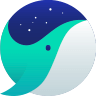
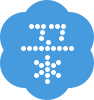

In [143]:
print(html)

In [144]:
soup = BeautifulSoup(html, 'html.parser')

(
 <!DOCTYPE html>
  <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter
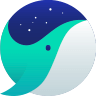
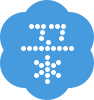

In [145]:
soup, type(soup)

### attrs =

In [146]:
# result = soup.find_all('span', class_='blind')[0]
# result = soup.find_all('a')attrs={'class' : 'fix'}
# result = soup.find_all('span', class_='fix')
result = soup.find_all('span', attrs={'class' : 'fix'})

result, type(result)

([<span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span>,
  <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@txt@</span>,
  <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@txt@</span>,
  <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@query@ <span class="context">@intend@</span></span>],
 bs4.element.ResultSet)

### string= str | re.pattern

In [147]:
req = requests.get('https://www.naver.com')
html = req.text

soup = BeautifulSoup(html, 'html.parser')
print(soup.find_all(string='네이버'))
print(soup.find_all(string=re.compile('네이버')))

[]
['네이버를 시작페이지로', '쥬니어네이버', '언론사가 직접 편집한 뉴스들을 네이버 홈에서 바로 보실 수 있습니다.', '네이버 개발자 센터', '네이버 D2', '네이버 D2SF', '네이버 랩스', '네이버 정책 및 약관', '네이버 정책']


## select_one(), select()
- CSS 선택자를 활용하여 원하는 정보를 가져옴(태그를 검색하는 find, find_all과 비슷함)
- class는 ., id는 #로 표시

url = "https://finance.naver.com/marketindex/"
- exchangeList > li.on > a.head.jpy > div > span.value

In [148]:
url = "https://finance.naver.com/marketindex/"

In [150]:
res = req.urlopen(url)

In [151]:
soup = BeautifulSoup(res, 'html.parser')
price = soup.select_one('div.head_info > span.value').string
print('usd/krw = ', price)

usd/krw =  1,311.50


## BeautifulSoup의 속성접근

In [152]:
html_doc = """<html><head><title>The Dormouse's story</title></head>
<body>
<div></div>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

In [153]:
bs = BeautifulSoup(html_doc, 'html.parser')
# lxml

In [154]:
print(bs.prettify()) # 난 왜 인덴트 안됌..?

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <div>
  </div>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


- ._tagName_ 태그 포함 내용

In [155]:
bs.title, type(bs.title)

(<title>The Dormouse's story</title>, bs4.element.Tag)

- ._tagname_.name : 태그 이름을 str으로

In [156]:
bs.title.name, type(bs.title.name)

('title', str)

- .parent : 상위 태그

In [157]:
type(bs.title.parent.name), bs.title.parent.name

(str, 'head')

In [158]:
bs.p

<p class="title"><b>The Dormouse's story</b></p>

In [159]:
bs.a

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

## .find/ .find_all(_tagName_ | _attrName_ = _attrValue_ )

In [160]:
bs.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [161]:
bs.find(id='link3')

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

## _attrValue_ 에 접근하기

- tagObject[속성명]

In [162]:
bs.a['class']

['sister']

- tagObject.get(속성명)

In [163]:
for link in bs.find_all('a'):
    print(link.get('href'))

http://example.com/elsie
http://example.com/lacie
http://example.com/tillie


In [164]:
bs.find_all()

[<html><head><title>The Dormouse's story</title></head>
 <body>
 <div></div>
 <p class="title"><b>The Dormouse's story</b></p>
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>
 <p class="story">...</p>
 </body></html>,
 <head><title>The Dormouse's story</title></head>,
 <title>The Dormouse's story</title>,
 <body>
 <div></div>
 <p class="title"><b>The Dormouse's story</b></p>
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;

In [165]:
bs.find_all('p')

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

## .string vs. get_text()
- get_text()를 이용하면 한방에 현재 HTML 문서의 모든 텍스트를 추출할 수 있습니다. 조금 더 정확히 표현하면 get_text() 메서드는 현재 태그를 포함하여 모든 하위 태그를 제거하고 유니코드 텍스트만 들어있는 문자열을 반환
- string의 경우 문자열이 없으면 None을 출력하지만, get_text()의 경우 유니코드 형식으로 텍스트까지 문자열로 반환하기 때문에  아무 정보도 출력되지 않는다.
- string 속성은 태그(tag) 내 문자열을 반환. get_text()를 사용하더라도 정확하게 문자열을 추출하기 위해서는 항상 마지막 태그에 메서드를 사용


In [166]:
print(bs.string)

None


### get_text() vs. .text
- get_text()는 추가적인 옵션을 넣어줄 수 있다.
- https://jinukk.github.io/2019/07/18/190718-DEVLOG-OHOME/

In [167]:
print(type(bs.get_text()), bs.get_text())

<class 'str'> The Dormouse's story


The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...



In [168]:
print(type(bs.text), bs.text) 

<class 'str'> The Dormouse's story


The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...



In [169]:
print(bs.find('div').string)

None


In [170]:
print(bs.find('div').get_text())

In [171]:
print(bs.find('body').string)

None


In [172]:
print(bs.find('body').get_text())



The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...



In [173]:
li = bs.find_all('p')
li

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [174]:
for i in li:
    print(i.string) # tag가 여러 개면 안 나옴

The Dormouse's story
None
...


In [175]:
for i in li:
    print(i.text, '\n')

The Dormouse's story 

Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well. 

... 



# urllib & BeautifulSoup

In [176]:
url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'

html = rq.urlopen(url)
bs = BeautifulSoup(html, 'lxml')

text = bs.find('p')
text = text.text
print(text)

bs.find('div').find('a').string

items = bs.find('div').find_all('a')
for item in items:
    print(item.string)

AiRS추천으로 구성된 뉴스를 제공합니다.
메인 메뉴로 바로가기
본문으로 바로가기
검색
NAVER
뉴스
TV연예
스포츠
날씨
프리미엄
None
None
None
None
None
None
None
None
None
None
None
None
전체 언론사
뉴스스탠드
라이브러리
전체 언론사
뉴스스탠드
라이브러리
정치
대통령실 
국회/정당 
북한 
행정 
국방/외교 
정치일반 
None
None
None
None
첫 대정부질문 '경찰국' 공방…오늘 행안부 업무보고
경찰 집단행동 두고 여야정 격돌…'배후세력' 언급도
이상민 "경찰 내란이라 하진 않았다…쿠데타·내란 달라"(종합2보)
박주민 "경찰 모임이 내란?" vs 이상민 "쿠데타랑 내란은 달라"
None
None
권영세 "의사 반한 강제북송, 2019년 '어민북송'이 유일"
권영세 "탈북민 의사 반한 강제 북송, 2019년 사례가 유일"
권영세 "탈북어민 흉악범이라 북송? 문명국가선 있을 수 없어"
권영세 "탈북민 의사 반한 강제북송, 2019년 '어민북송'이 유일"(종합)
None
None
전·현직 법무장관, 국회서 '정면충돌'
맞붙은 박범계·한동훈…“인사권 맘대로” vs “본인도 패싱하지 않았냐”
'실세장관' 2인 집중 타깃한 민주…韓·李, '엄호' 대치전선(종합)
 한동훈 "인사검증관리 문제라면 민정수석실 업무도 위법"[현장연결]
None
None
尹대통령 "여가부 폐지 로드맵 조속히 마련"
尹대통령, 여가부 업무보고 받은 뒤 "폐지 로드맵 빨리 만들라" 지시
한부모 양육지원·아이돌보미 확대…여가부 폐지는 “확정인데 아직 조율중”
식물부처 전락 여가부…윤 정부 여성공약은 타부처가
None
None
 '셀프 보상 논란' 野 추진 '민주유공자법'…"박탈감 준다"는 혜택 뭐길래 등[7/25(월) 데일리안 출근길 뉴스]
None
국민의힘 "민주 유공자법, 광범위·셀프 특혜" 사실은
None
None
유시민 “尹 정부 ‘무신정권’ 같아…자기 감정대로 해”
None
유시민 "尹정부는 무신정권, 국민의힘은 마약중독 상태"

## .string vs. get_text() 추가

In [177]:
items = bs.find('div', id='header').find_all('a')
for item in items:
    print(item.text)

메인 메뉴로 바로가기
본문으로 바로가기
검색
NAVER
뉴스
TV연예
스포츠
날씨
프리미엄
언론사별 
정치 선택됨
경제 
사회 
생활/문화 
IT/과학 
세계 
랭킹 
신문보기 
오피니언 
TV 
팩트체크 
전체 언론사
뉴스스탠드
라이브러리
전체 언론사
뉴스스탠드
라이브러리


In [178]:
text = bs.find_all('p')
for t in text:
    print(t.string)

None
오전 7시~오전 8시까지 집계한 결과입니다.
본 콘텐츠의 저작권은 제공처 또는 네이버에 있으며 이를 무단 이용하는 경우 저작권법 등에 따라 법적책임을 질 수 있습니다.


In [179]:
text = bs.find_all('p')
for t in text:
    print(t.text)

AiRS추천으로 구성된 뉴스를 제공합니다.
오전 7시~오전 8시까지 집계한 결과입니다.
본 콘텐츠의 저작권은 제공처 또는 네이버에 있으며 이를 무단 이용하는 경우 저작권법 등에 따라 법적책임을 질 수 있습니다.


In [180]:
import urllib.request as rq
url = "https://news.naver.com"
html = rq.urlopen(url)
bs = BeautifulSoup(html, 'lxml')
bs

<!DOCTYPE html>
<html lang="ko">
<head>
<title id="browserTitleArea">네이버 뉴스</title>
<script>
	function isMobileDevice() {
		return /^.*(iPhone|iPod|iPad|Android).*/.test(navigator.userAgent);
	}
</script>
<script>
	(function () {
		try {
			if (isMobileDevice() && isAbleApplyPrefersColorScheme()) {
				
				document.querySelector("html").classList.add("DARK_THEME");
			}
		} catch(e) {}

		function isAbleApplyPrefersColorScheme() {
			
			if (window.matchMedia("(prefers-color-scheme)").matches === false) {
				return false;
			}

			var userAgent = navigator.userAgent;

			if (userAgent.indexOf("NAVER") > -1) {
				
				if (/.*NAVER\([a-zA-Z]*;\s[a-zA-Z]*;\s([0-9]*);/.test(userAgent)) {
					return Number(RegExp.$1) >= 1000;
				}
			} else {
				
				return document.cookie.indexOf("NSCS=1") > -1;
			}

			return false;
		}
	})();
</script>
<script>
		var g_ssc = 'news.v3_media' || null;
		</script>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1.0,maximum-sca

In [181]:
for i in re.findall('[가-힣]+', bs.text):
    print(i, end=' ')

네이버 뉴스 본문 바로가기 뉴스 연예 스포츠 날씨 프리미엄 검색 언론사별 정치 경제 사회 생활 문화 과학 세계 랭킹 신문보기 오피니언 팩트체크 전체 언론사 뉴스스탠드 라이브러리 콘텐츠 화 전체 언론사 뉴스스탠드 라이브러리 언론사편집 기자 연재 구독설정 속보 코로나 신규 확진자 만 명 만명 육박 파이낸셜뉴스 내용작성전 분기 경제성장률 민간소비 증가 영향 부산일보 분기 성장률 민간소비 증가 덕분 수출은 감소 문화일보 분기 성장률 소비 살아났지만 수출 마이너스 서울신문 속보 닫기 국민일보 월 일 구독 새로 산 벤츠 썩은 차였다 트렁크 속 처참한 상태 구매한 지 주밖에 되지 않은 벤츠 차량이 내부 부품이 부식된 불량 신차 였음에도 감가상각 등을 이유로 벤츠코리아 측으로부터 만원의 교환 비용을 요구 받았다는 차주의 사연의 전해져 논란이 일고 있다 문화일보 월 일 구독 기독교인이 저지른 악행 겸허히 용서 구해 교황 캐나다 원주민에 사과 캐나다 옛 교회 운영 기숙학교서 벌어진 원주민 아동 학대와 문화 말살에 사과 프란치스코 교황은 일 현지시간 캐나다의 원주민들에게 과거 교회가 저지른 악행에 대해 용서를 구했다 이날 외신에 따르면 프란치스코 교 매일신문 월 일 구독 만취 운전 박순애 징계 안 받고 포상 받아 안민석 교육부 수장 자격 있는지 의문 최근 년 음주운전으로 징계 받은 교원이 명을 훌쩍 넘긴 것으로 집계됐다 박순애 사회부총리 겸 교육부장관은 만취 음주운전 에도 징계를 받지는 않은 것으로 드러나면서 논란이 재차 확산될 것으로 보인다 안민석 경향신문 월 일 구독 러 노르트스트림 가스관 터빈 추가 가동중단 러시아가 독일로 연결되는 노르트스트림 가스관의 터빈 또 하나를 가동 중단한다고 일 현지시간 밝혔다 타스 통신 등에 따르면 러시아 국영가스회사 가스프롬은 이날 보도문을 내 정기 수리까지의 가동 기한이 끝남 청주방송 월 일 구독 동영상 재생시간 김영환 충북지사 전임자 역점사업 줄 폐기 시사 김영환 지사가 전임 이시종 지사의 역점 사업인 무예마스터십에 대한 지원 중단을 선언했

이상민 행정안전부 장관을 지난 일 이코노미스트 월 일 구독 집값 년째 하락하는 세종 투지과열지구 해제될까 세종시의 집값이 전국에서 가장 큰 폭으로 떨어지는 가운데 지방에서 유일한 투기과열지구로 남은 세종의 규제 지역 해제에 관심이 쏠리고 있다 일 한국부동산원의 주간 아파트 가격 동향에 따르면 월 주 월 일 새로보기 블로터 월 일 구독 이렇게 바뀐다 공인 에이전트 기대 우려 한 몸에 리그 오브 레전드 챔피언스코리아 이하 가 신규 제도 도입을 통해 지속가능성 을 확보한다고 밝혔습니다 신인 발굴을 위한 육성권 제도부터 공인 에이전트 제도화 및 지정선수 특별협상 으로 리그 경쟁 주간동아 월 일 구독 햇반 천하 에 도전장 낸 오뚜기와 하림 즉석밥 시장판도 바꿀까 원 미만 초저가 마트 즉석밥도 인기 퇴근하고 집에 와서 배가 고픈데 밥솥에 밥이 똑 떨어졌을 때 부엌 상비군 즉석밥을 찾는 사람이 적잖을 것이다 코로나 에 감염돼 집에서 자가격리를 해야 했을 때도 즉석 중앙일보 월 일 구독 마스크 무료로 나눠주던 목사 그는 김연아 예비 시아버지 김연아와 결혼으로 배우자가 될 그룹 포레스텔라의 고우림뿐만 아니라 예비 시아버지 인 고경수 목사에 대한 관심도 커지고 있다 고경수 목사는 소외 계층을 위해 꾸준히 봉사활동을 하는 대구 이주민센교센터를 운영하고 있 한국경제 월 일 구독 마스크 나눠주던 목사님 알고보니 김연아 예비 시아버지 피겨퀸 김연아와 크로스오버 그룹 포레스텔라 멤버 고우림이 오는 월 결혼하는 가운데 고우림의 가족에 대한 네티즌들의 관심이 커지고 있다 고우림의 부친은 대구평화교회 고경수 목사로 소외 계층을 위해 봉사활동 월 일 구독 동영상 재생시간 또 자녀 숨지게 한 후 극단 선택 최악의 아동학대 부모가 어린 자녀를 숨지게 한 뒤 스스로 목숨을 끊는 일이 또 벌어졌습니다 이같은 일은 동반자살 이 아닌 명백한 살인 이자 가장 극단적인 아동학대 범죄입니다 보도에 하정연 기자입니다 기자 오늘 일 새로보기 연합뉴스 월 일 구독 동영상 재생시간 법원 주동안 재판 쉰다 대장동 재판

 일 구독 서로 쿠데타 비난 정부 일선경찰 극한대립 국민의 경찰 죽었다 경찰청에 근조화환 직협은 곳곳서 인 시위 쿠데타 빗댄 이상민 인식 문제 항명 모의 경찰판 하나회 경찰 징계 놓고 전문가들 복종의무 위반 과도한 제약 이전 다음 우영우 읽기 한경비즈니스 월 일 구독 통신 공룡 는 어떻게 우영우 를 만들었나 우영우 읽기 권모술수 권민우와 우당탕탕 우영우가 회사에서 사는 법 편견 을 넘어서며 발전하는 인류의 역사 이전 다음 심층기획 월 일 구독 윤 대통령 여가부 폐지 로드맵 조속 마련 지시 폐지 현실화 주차 카페 편의점 일 시키고 행정 보조 신고 르포 조선소 곳곳서 용접음 파업 후유증은 부담 스쿨존 불법주정차 만 건 분석 사고 절반이 일치 이전 다음 새로보기 언론사별 심층기획 인터뷰 국민일보 월 일 구독 인터뷰 나경원 경제위기인데 전당대회 국민은 관심 없다 인터뷰 김민석 정부 폭주 시작 국민들 촛불 들 수도 인터뷰 인위적 단일화 효과 있겠나 이재명 의원과 경쟁 이전 다음 정부 첫 대정부질문 데일리안 월 일 구독 첫 대정부질문 스타 장관 될라 한동훈과 맞대결 피한 첫 대정부 질문 경찰국 신설 공방 법과 원칙 졸속 첫 대정부 질문 탈북어민 강제북송 흉악범이어도 잘못된 것 한동훈 대 박범계 전현직 맞대결 첫 대정부 질문 관전 포인트 이전 다음 심층기획 월 일 구독 이슈체크 경찰대 출신 저격 갈등에 기름 부은 장관의 입 목적지 없이 호출 타다식 렌터카 택시대란 잡힐까 밀착카메라 희귀 꽃 위로 내려앉은 죽음 대나무숲 미스터리 이전 다음 새로보기 언론사별 심층기획 심층기획 강원일보 월 일 구독 다양성 갖춘 새로운 시도들그동안 없었던 클래식 무대 이혜연 농구선수 출신 고졸여성이 은행 지점장까지 된 비결요 버텨야 한다는 간절함 때문 나를 믿어야 얻을 수 있더군요 메트로폴리탄 뉴욕 중세풍 유리램프 만들고백악관 인테리어 도맡아명품 주얼리 티파니 뜻밖의 도전 우울감 스트레스 심리치료 시스템 우선 이전 다음 심층기획 코리아헤럴드 월 일 구독 이전 다음 우산 양산 농민신문 월 일 구독

In [213]:
import urllib.request as rq
url = "https://news.naver.com"
html = rq.urlopen(url)
bs = BeautifulSoup(html, 'lxml')
bs

<!DOCTYPE html>
<html lang="ko">
<head>
<title id="browserTitleArea">네이버 뉴스</title>
<script>
	function isMobileDevice() {
		return /^.*(iPhone|iPod|iPad|Android).*/.test(navigator.userAgent);
	}
</script>
<script>
	(function () {
		try {
			if (isMobileDevice() && isAbleApplyPrefersColorScheme()) {
				
				document.querySelector("html").classList.add("DARK_THEME");
			}
		} catch(e) {}

		function isAbleApplyPrefersColorScheme() {
			
			if (window.matchMedia("(prefers-color-scheme)").matches === false) {
				return false;
			}

			var userAgent = navigator.userAgent;

			if (userAgent.indexOf("NAVER") > -1) {
				
				if (/.*NAVER\([a-zA-Z]*;\s[a-zA-Z]*;\s([0-9]*);/.test(userAgent)) {
					return Number(RegExp.$1) >= 1000;
				}
			} else {
				
				return document.cookie.indexOf("NSCS=1") > -1;
			}

			return false;
		}
	})();
</script>
<script>
		var g_ssc = 'news.v3_media' || null;
		</script>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1.0,maximum-sca

In [214]:
text = bs.find_all('p')

In [216]:
for p in text:
    print(p.string, end='\n')

젠더&섹슈얼리티연구소 숨 7월 연구 발표회 김경태 연세대학교 국어국문학과 강사 '마초와 마요미 사이에서 - 마동석의 남성성 연구' 발표 마초 혹은 귀여운 이미지로 대표되는 배우 마동석의 남성성에 대한 연구 결과가 나
상장기업의 주요 공시내용을 선별해 아침 출근길에 전해드리는 [공시줍줍 PICK]! 오늘 공시픽은 배터리 화재사건으로 자동차 리콜비용을 부담하게 된 LG전자와 LG에너지솔루션, 시세보다 31%나 저렴하게 주식을 확보한
산악인 엄홍길이 호텔 가이드가 됐다. 강원도 운탄고도 트레킹 코스 중간 마을, 영월의 '모운동' 전체가 호텔로 바뀌었고, 탤런트 정보석과 이장우가 각각 호텔 지배인과 매니저로 변신했다. 영월에서 대체 어떤 일이 벌어
당원권 정지 6개월 중징계를 받은 국민의힘 이준석 대표가 전국을 돌며 시도지사 및 2030 당원 등과 만남을 이어가고 있는 가운데, 25일에는 울릉도에서 당원들과 만남을 가졌다. 연합뉴스 등에 따르면 이 대표는 전날
한동훈 법무부 장관과 문재인 정부 마지막 법무부 장관인 박범계 더불어민주당 의원이 25일 윤석열 정부 첫 국회 대정부질문에서 신구 권력 대리전을 치렀다. 여야 의원들은 본회의장 의석에서 박수 또는 야유로 각각 ‘응원
◀ 앵커 ▶ 광주의 한 고등학교에서 기말고사 답안이 유출됐다는 의혹이 일고 있습니다. 한 학생이 시험이 끝날 때마다 수상한 쪽지를 찢어 버리는 걸 동급생들이 목격하면서 문제 제기가 시작됐습니다. 이다현 기자의 보도입
■ 레고랜드 5번째 멈춤사고…"또요?" 놀이기구가 멈췄다는 소식을 들은 대부분 사람의 반응은 한결같았습니다. '왜 이렇게 자주?' '또?' 멈췄냐는 것입니다. 개장 두 달 만에 놀이기구가 5번이나 멈춰섰기 때문입니다
현대자동차에서 내놓은 대형 SUV 팰리세이드에서 시동 꺼짐 현상이 자주 발생한다는 보도, 전해드렸는데요. 취재 결과 그룹 내 계열사인 기아의 카니발에서도 시동 꺼짐 현상이 나타나는 것으로 밝혀졌는데, 팰리세이드 경우
정부가 인구 감소 지역에 외국인 정착을 장려하기 위해 '지

# requests  & BeautifulSoup

In [188]:
url = "https://www.naver.com"
r = requests.get(url)

In [189]:
html = r.text

<!DOCTYPE html>
<html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:
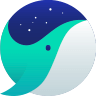
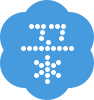

In [190]:
bs = BeautifulSoup(html, 'lxml')
bs

In [191]:
bs.find('p')

<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p>

In [192]:
text = bs.find('p').get_text()
text

'\n\n'

# 과제들

## 과제0725_1
- 상기 출력물을 불필요한 공백없이 정렬하여 출력하세요.

In [193]:
url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'

html = rq.urlopen(url)
bs = BeautifulSoup(html, 'lxml')

items = bs.find('div').find_all('a')
for item in items:
    print(item.text, end=' ')

메인 메뉴로 바로가기 본문으로 바로가기 검색 NAVER 뉴스 TV연예 스포츠 날씨 프리미엄 언론사별  정치 선택됨 경제  사회  생활/문화  IT/과학  세계  랭킹  신문보기  오피니언  TV  팩트체크  전체 언론사 뉴스스탠드 라이브러리 전체 언론사 뉴스스탠드 라이브러리 정치 대통령실  국회/정당  북한  행정  국방/외교  정치일반    안내헤드라인 뉴스 

동영상기사
 박범계-한동훈 맞대결 "왕중왕, 1인지배"‥"의원님 장관 때 총장 패싱" 박범계 “택도 없는 말 마라” vs 한동훈 “의원님 장관 때 총장 패싱” 한동훈 "文민정실도 위법"… `인사검증` 되치기에 말 막힌 박범계 '실세장관' 2인 집중 타깃한 민주…韓·李, '엄호' 대치전선(종합2보) 92개의 관련뉴스 더보기 

 고성 오간 대정부 질문.. 野 "경찰회의가 쿠데타냐" vs 與 "文정부가 괴물국가 만들었다" 막 오른 국회 대정부질문…5년 만에 공수 바뀐 與野 여야, 대정부질문서 격돌…어민 북송·경찰국 쟁점 ‘인사 검증·경찰국’ 타깃, 민주당 ‘좌동훈 우상민’에 포화 23개의 관련뉴스 더보기 

 與, 국민의당몫 최고위원 2명 임명키로…"금명 전국위 개최" 與, 안철수 요구 받는다…이준석 반대한 최고위원 2명 임명키로 울릉도 간 이준석…국힘, 安 몫 최고위원 임명 ‘속도’ 착착 국힘, 安 추천 최고위원 2명 선임 절차…28일 '전국위 소집안' 상정 17개의 관련뉴스 더보기 

 尹대통령, 故 옴스테드 장군 조전 “영웅들을 잊지 않고 기억할 것” 윤 대통령, 美 '장진호 영웅' 별세에 조전…"슬픔 금할 수 없어" 尹대통령, 美 '장진호 영웅' 별세에 조전…"슬픔 금할수 없어" 尹, 故 옴스테드 장군 조전…"공산화 위기서 대한민국 지켜낸 영웅" 23개의 관련뉴스 더보기 

 안보실, 한-인니 정상회담에 "尹정부 아세안 외교 시작 알리는 신호탄" 

 한·인니 정상회담 28일 개최…"尹정부 아세안외교 신호탄" 36개의 관련뉴스 더보기 

 尹대통령, ‘여가부 폐지 로드맵’ 조속마련 지시 

동영상

In [253]:
url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'

html = rq.urlopen(url)
bs = BeautifulSoup(html, 'lxml')

items = bs.find('div').find_all('a')
str_all = ""
for item in items:
    str_all += item.text
print(re.sub( "\'", " " , re.sub('\s+', ' ', str_all)))

메인 메뉴로 바로가기본문으로 바로가기검색NAVER뉴스TV연예스포츠날씨프리미엄언론사별 정치 선택됨경제 사회 생활/문화 IT/과학 세계 랭킹 신문보기 오피니언 TV 팩트체크 전체 언론사뉴스스탠드라이브러리전체 언론사뉴스스탠드라이브러리정치대통령실 국회/정당 북한 행정 국방/외교 정치일반 안내헤드라인 뉴스 "한-인니 정상회담서 KF-21 분담금 미납 문제 논의할 예정"尹대통령, 28일 인니 대통령과 정상회담…방산·인프라·경제안보 논의한·인니 정상회담 28일 개최…"윤 정부 아세안외교 신호탄"한-인니 정상회담…尹 정부,  아세안 외교  신호탄35개의 관련뉴스 더보기 尹, 故 옴스테드 장군 조전…"공산화 위기서 대한민국 지켜낸 영웅" 해병 병사 출발, 중장으로 전역…한국전쟁 장진호 전투의 영웅[삶과 추억]尹, 장진호 전투 美 예비역 중장에 조전‘장진호전투 영웅’ 옴스테드 美예비역 중장 별세22개의 관련뉴스 더보기 “여가부 폐지 로드맵 조속히 마련하라”尹 "여가부 폐지 로드맵 필요"...성범죄 피해 男 보호시설 설치윤 대통령, 지지율 때문?…돌연 여가부 폐지 속도전 주문尹, 폐지 빼고 보고한 여가부에 “폐지안 조속 마련하라”93개의 관련뉴스 더보기 尹, 8월 첫주 여름휴가…"공무원들 다 휴가가라"연일 국회 손짓하는 尹…"내수 진작 차원" 공무원 휴가 독려[속보] 윤 대통령 다음주 여름휴가…全공무원 휴가 독려尹대통령, 다음주 여름휴가…8월 중 국회의장단과 회동 추진47개의 관련뉴스 더보기 울릉도 간 이준석 "5명이 만나자 해도 갈 것"...장외 정치 계속 이준석 "5명의 당원이 만나고자 해도 다 찾아가겠다"(종합)30개의 관련뉴스 더보기 野 "대통령실 사적채용 민망…공정 기회 빼앗는 부정채용" 맹공  사적채용  논란에 한덕수 "별정직 채용은 좀 다르다"27개의 관련뉴스 더보기 박진 "윤 대통령 나토행 사전답사 인사비서관 부인 동행 몰랐다" 고민정 "나토순방 답사단 명단 제출하라" 박진 "기억 못해"9개의 관련뉴스 더보기 감사원 1차장에  태양광 비리 감사  김경호‥2차장 현완

## 과제0725_2
- 기상청 육상 정보에서 강원도의 지역번호는 105이다. 강원도의 날씨 예보를 불필요한 공백을 제거한 후 출력하세요.

https://www.weather.go.kr/plus/land/forecast/summary.jsp?stnId=105

In [254]:
URL = 'https://www.weather.go.kr/plus/land/forecast/summary.jsp'

In [255]:
params = {'stdln' : 105}

response = requests.get(URL, params=params)
html = response.text
print(html)

<!DOCTYPE html>

<html lang="ko">
	<head>
		<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
		<title>예보요약 &gt; 동네예보 &gt; 단기예보 &gt; 육상날씨 &gt; 기상플러스 </title>
		
		<meta charset="utf-8" />
		<meta name="title" content="육상날씨 - 기상청 기상 플러스" />
		<meta name="author" content="기상청" />
		<meta name="keywords" content="육상날씨,날씨,기상청,기상 플러스" />
		<meta name="description" content="기상청 날씨누리 기상플러스 육상날씨입니다." />
		
		
		<link href="/plus/resources/css/slick.css?ver=2020092501" rel="stylesheet" type="text/css">
		<link href="/plus/resources/css/basic.css?ver=2020092501" rel="stylesheet" type="text/css">
		<link href="/plus/resources/css/common-layout.css?ver=2020092501" rel="stylesheet" type="text/css">
		<link href="/plus/resources/css/plus.css?ver=2020092501" rel="stylesheet" type="text/css">
		<link href="/plus/resources/css/custom.css?ver=2020092501" rel="stylesheet" type="text/css">
		
		<script src="/plus/resources/js/moment-with-locales.js"></script>
		<script src="/plus/resources/js/jquery

In [257]:
bs = BeautifulSoup(html, 'lxml')

In [258]:
contents = []
for i in bs.find_all('p'):
    li = i.find_all('span')
    if li:
        contents += li

In [259]:
str_forcast = ""
for c in contents:
    str_forcast += c.text + '\n'
print(str_forcast)

2022년 07월 26일 (화)요일 05:00 발표
□  (종합) 무더위 유의, 오늘과 내일 소나기 곳, 돌풍과 천둥.번개 유의
○  (오늘) 전국 가끔 구름많음, 오후(12~18시)부터 저녁(18~21시) 사이 경기동부와 강원영서, 충남남부내륙, 충북북부, 전라권내륙, 경북북부내륙 소나기 곳
○  (내일) 전국 가끔 구름많음, 오후(12~18시)부터 저녁(18~21시) 사이 수도권과 강원영서, 충남권내륙, 전북서부, 경북북부내륙 소나기 곳
○  (모레) 전국 가끔 구름많음

□  소나기에 의한 예상 강수량
○  (26일) 경기동부, 강원영서, 충남남부내륙, 충북북부, 전라권내륙, 경북북부내륙: 5~40mm
○  (27일) 수도권, 강원영서, 충남권내륙, 전북서부, 경북북부내륙: 5~20mm



In [260]:
for c in contents:
    taps = 0
    class_ = c.get('class')
    if class_ :
        taps = int(class_[0].split("_")[1])
    print('\t'*taps, c.text)

 2022년 07월 26일 (화)요일 05:00 발표
	 □  (종합) 무더위 유의, 오늘과 내일 소나기 곳, 돌풍과 천둥.번개 유의
		 ○  (오늘) 전국 가끔 구름많음, 오후(12~18시)부터 저녁(18~21시) 사이 경기동부와 강원영서, 충남남부내륙, 충북북부, 전라권내륙, 경북북부내륙 소나기 곳
		 ○  (내일) 전국 가끔 구름많음, 오후(12~18시)부터 저녁(18~21시) 사이 수도권과 강원영서, 충남권내륙, 전북서부, 경북북부내륙 소나기 곳
		 ○  (모레) 전국 가끔 구름많음

	 □  소나기에 의한 예상 강수량
		 ○  (26일) 경기동부, 강원영서, 충남남부내륙, 충북북부, 전라권내륙, 경북북부내륙: 5~40mm
		 ○  (27일) 수도권, 강원영서, 충남권내륙, 전북서부, 경북북부내륙: 5~20mm


## 과제0725_3. 
- "http://www.naver.com" 사이트에서 span 태그에 연결된 한글만을 불필요한 공백을 제거한 후 출력하세요.



In [261]:
URL = "https://www.naver.com"
response = requests.get(URL)
html = response.text
bs = BeautifulSoup(html, 'lxml')

str_all = ""
for span in bs.find_all('span'):
    str_all += span.text + " "

str_all = re.sub('[^가-힣]+', ' ', str_all)
print(str_all)

뉴스스탠드 바로가기 주제별캐스트 바로가기 타임스퀘어 바로가기 쇼핑캐스트 바로가기 로그인 바로가기 매일 쓰는 브라우저 보안이 걱정된다면 안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요 매일 쓰는 브라우저 보안이 걱정된다면 다운로드 쥬니어네이버 해피빈 검색 한글 입력기 자동완성 레이어 삭제 설정이 초기화 된다면 도움말을 확인해주세요 설정이 초기화 된다면 도움말을 확인해주세요 도움말 도움말 자동저장 끄기 자동저장 끄기 회차 당첨번호 추첨 지급기한 년 추첨 지급기한 년 원 원 바로가기 바로가기 추가 추가 추가 자세히보기 도움말 신고 도움말 신고 자동완성 끄기 자동완성 끄기 쇼핑 쇼핑 이태원동 이태원동 리스트형 썸네일형 설정 이전 다음 닫기 닫기 이전 다음 닫기 닫기 이전 다음 다음 닫기 닫기 이전 다음 닫기 닫기 주제별로 분류된 다양한 글 모음 개의 글 이전 다음 주일 전 희에피소드 희에피소드 일 전 봄로이맘 봄로이맘 주일 전 인터스타일 매거진 인터스타일 매거진 주일 전 더맑음 더맑음 개월 전 컴홈 컴홈 일 전 나리 나리 일 전 로지 로지 일 전 나무신문 나무신문 이전 다음 펀딩 달성 에코파티메아리 에코파티메아리 펀딩 달성 팀앤팀 팀앤팀 기부 원 기부 인애종합사회복지관 인애종합사회복지관 펀딩 달성 프루떼 프루떼 펀딩 달성 별별마켓 별별마켓 기부 원 기부 사단법인 파티마성모자선회 사단법인 파티마성모자선회 주일 전 김매니 김매니 주일 전 월간 전원속의 내집 월간 전원속의 내집 주일 전 단비타민 단비타민 일 전 총각 총각 주일 전 비니주니홈 비니주니홈 주일 전 주일 전 리빙 레시피 리빙 레시피 주일 전 리빙 레시피 리빙 레시피 일 전 됴미 됴미 주일 전 힐링제이 힐링제이 주일 전 대장 대장 주일 전 익명 익명 일 전 전원주택라이프 전원주택라이프 주일 전 채블리홈 채블리홈 주일 전 리빙 레시피 리빙 레시피 주일 전 민트향기 민트향기 주일 전 쎄씨주부 쎄씨주부 주일 전 똘배 똘배 주일 전 주일 전 요나 요나 개월 전 꿀하우스 꿀하우스 개월 전 아루굴라쏭 아루굴라쏭 일 전 

## 과제0725_4. 
- "http://www.naver.com" 사이트에서 span 태그에 연결된 문자와 숫자만을 불필요한 공백을 제거한 후 출력하세요.



In [263]:
URL = "http://www.naver.com"
response = requests.get(URL)
html = response.text
bs = BeautifulSoup(html, 'lxml')

str_all = ""
for span in bs.find_all('span'):
    str_all += span.text + " "

str_all = re.sub('[^\w]+', ' ', str_all)
print(str_all)

뉴스스탠드 바로가기 주제별캐스트 바로가기 타임스퀘어 바로가기 쇼핑캐스트 바로가기 로그인 바로가기 매일 쓰는 브라우저 보안이 걱정된다면 안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요 매일 쓰는 브라우저 보안이 걱정된다면 다운로드 쥬니어네이버 해피빈 검색 한글 입력기 자동완성 레이어 txt txt date 삭제 설정이 초기화 된다면 도움말을 확인해주세요 설정이 초기화 된다면 도움말을 확인해주세요 도움말 도움말 자동저장 끄기 자동저장 끄기 5 회차 당첨번호 추첨 13 지급기한 1년 추첨 13 지급기한 1년 6 7 8 9 10 11 12 6 7 8 9 10 11 12 14 txt currency currency 8 9 8 9 6 원 6 원 txt 7 message 7 message 7 8 7 8 7 txt 5 5 바로가기 바로가기 txt 추가 txt date 추가 query intend intend 추가 자세히보기 도움말 신고 도움말 신고 자동완성 끄기 자동완성 끄기 쇼핑 쇼핑LIVE 24 0 33 0 이태원동 이태원동 리스트형 썸네일형 설정 이전 다음 닫기 닫기 이전 다음 닫기 닫기 이전 다음 다음 닫기 닫기 이전 다음 닫기 닫기 주제별로 분류된 다양한 글 모음 676 개의 글 이전 다음 삼월에 마하 하노HANO 삼월에 마하 하노HANO 요일별 웹툰 요일별 웹툰 여우자매 여우자매 멸망 이후의 세계 멸망 이후의 세계 위 유지 박태준 만화회사 정종택 39화 성한수의 낭만 위 유지 야옹이 217화 위 유지 seri 비완 40화 지금은 약한 척 위 유지 S Cynan 언데드 감자 제 25 화 위 유지 홍비치라 2부 62화 사람을 살리는 사람 2 위 유지 모죠 7화 강적 등장 위 유지 오세형 시즌2 마지막화 강한녀석들 위 유지 요다 42화 주제 잡기 3 위 유지 나락 풍백 60화 성유물 14 위 유지 철범 우푸 32화 공성 병기 플레어 위 유지 FUNA 아카타 이츠키 위 상승 장영훈 25화 무료 위 유지 이개미 위 상승 비가 25화 무료 위 유지 연희나 위 유지 삼색이

## 과제0725_5 
- "http://www.naver.com" 사이트에서 a 태그에 id가 있는 경우에 대하여 연결된 문자 + 숫자를 불필요한 공백을 제거한 후 한줄에 출력하세요.


In [264]:
URL = "http://www.naver.com"
response = requests.get(URL)
html = response.text
bs = BeautifulSoup(html, 'lxml')

In [265]:
all_a = bs.find_all('a')

In [266]:
for a in all_a:
    if a.get('id'):
        print(a.text, end=' ')

다운로드 네이버를 시작페이지로 한글 입력기 자동완성 레이어 관심주제 설정 TOP 

In [267]:
for a in all_a:
    try:
        print('\nid = ', a['id'], '\ttext = ', a.text)
    except:
        print('e', end=' ')

e e e e e e 
id =  NM_whale_download_btn 	text =  다운로드
e 
id =  NM_set_home_btn 	text =  네이버를 시작페이지로
e e 
id =  ke_kbd_btn 	text =  한글 입력기

id =  nautocomplete 	text =  자동완성 레이어
e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e 
id =  NM_THEME_EDIT_SET 	text =  관심주제 설정
e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e 
id =  NM_scroll_top_btn 	text =  TOP
e e e e e e e e e e e e e e e e 

In [270]:
url = 'https://www.naver.com'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html, 'lxml')

texts = bs.select('a[id]')
# print(texts)

li = []
for t in texts:
    li.append(t.get_text())


p = re.sub('[^\w+\d+]',' ', str(li))
p = re.sub('\s+',' ', p)
print(p)

 다운로드 네이버를 시작페이지로 한글 입력기 자동완성 레이어 관심주제 설정 TOP 


### tag이름.get(속성명) vs. tag이름[속성명]

In [241]:
html = """
<html>
<head></head>
<body>
    <div>어쩌고</div>
    <div> <a href="#" id="test_id">
    </div>
    <a href="#">
</body>
</html>
"""

bs = BeautifulSoup(html, 'lxml')
li_a = bs.find_all('a')

In [242]:
a0 = li_a[0]
a1 = li_a[1]

print('a0 : ', a0)
print('a1 : ', a1)

print(a0.get('id'), ', ', a0['id'])
print(a1.get('id'), type(a1.get('id')))

a0 :  <a href="#" id="test_id">
</a>
a1 :  <a href="#">
</a>
test_id ,  test_id
None <class 'NoneType'>


In [245]:
try:
    a1['id']
except KeyError:
    print('KeyError')

KeyError


## 과제0725_6
- url = 'https://news.naver.com/' 사이트 p태크에서 class가 cjs_ht인 데이터를 출력하세요.

In [272]:
URL = 'https://news.naver.com/'
response = requests.get(URL)
html = response.text
bs = BeautifulSoup(html, 'lxml')

In [274]:
for p in bs.find_all('p', class_="cjs_ht"): #attr={'class': 클래스명}
    print(p.text.strip())
    print(p)

오늘 언론사가 발행한종이신문에 실린 뉴스 1면기사가 제공됩니다.
<p class="cjs_ht">
                        
                            
                                오늘 언론사가 발행한<br/>종이신문에 실린 뉴스 1면<br/>기사가 제공됩니다.
                            
                            
                        
                    </p>


### \<br/>의 처리

# 자식 자손 형제 노드 접근

In [1]:
html="""
<head>
    <title>crawler</title>
</head>
<body>
    <p class="a" align="center"> text1</p>
    <p class="b" align="center"> text2</p>
    <p class="c" align="center"> text3</p>
    <div>
        <img src="/source" width="300" height="200">
    </div>
</body>
</html>
"""

## .children .descendants 자식 자손 

In [3]:
from bs4 import BeautifulSoup

bs = BeautifulSoup(html, 'html.parser')
contents = bs.find('body')
contents

<body>
<p align="center" class="a"> text1</p>
<p align="center" class="b"> text2</p>
<p align="center" class="c"> text3</p>
<div>
<img height="200" src="/source" width="300"/>
</div>
</body>

In [11]:
for child in contents.children: # .child : iterable object
    print(type(child))
    print(child, end=" ")

<class 'bs4.element.NavigableString'>

 <class 'bs4.element.Tag'>
<p align="center" class="a"> text1</p> <class 'bs4.element.NavigableString'>

 <class 'bs4.element.Tag'>
<p align="center" class="b"> text2</p> <class 'bs4.element.NavigableString'>

 <class 'bs4.element.Tag'>
<p align="center" class="c"> text3</p> <class 'bs4.element.NavigableString'>

 <class 'bs4.element.Tag'>
<div>
<img height="200" src="/source" width="300"/>
</div> <class 'bs4.element.NavigableString'>

 

In [10]:
for d in contents.descendants:
    print(type(d))
    print(d, end=" ")

<class 'bs4.element.NavigableString'>

 <class 'bs4.element.Tag'>
<p align="center" class="a"> text1</p> <class 'bs4.element.NavigableString'>
 text1 <class 'bs4.element.NavigableString'>

 <class 'bs4.element.Tag'>
<p align="center" class="b"> text2</p> <class 'bs4.element.NavigableString'>
 text2 <class 'bs4.element.NavigableString'>

 <class 'bs4.element.Tag'>
<p align="center" class="c"> text3</p> <class 'bs4.element.NavigableString'>
 text3 <class 'bs4.element.NavigableString'>

 <class 'bs4.element.Tag'>
<div>
<img height="200" src="/source" width="300"/>
</div> <class 'bs4.element.NavigableString'>

 <class 'bs4.element.Tag'>
<img height="200" src="/source" width="300"/> <class 'bs4.element.NavigableString'>

 <class 'bs4.element.NavigableString'>

 

# 활용 1

## find_all()의 limit= 옵션

In [276]:
from bs4 import BeautifulSoup

In [277]:
import urllib.request as rq

In [278]:
url="https://naver.com"
html = rq.urlopen(url)
bs = BeautifulSoup(html, 'lxml')

In [281]:
print(bs.find_all('p', limit=1), '\n')
print(bs.find_all('p', limit=2), '\n')
print(bs.find_all('p', limit=3), '\n')

[<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p>] 

[<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p>, <p class="dsc">ON/OFF 설정은<br/>해당기기(브라우저)에 저장됩니다.</p>] 

[<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p>, <p class="dsc">ON/OFF 설정은<br/>해당기기(브라우저)에 저장됩니다.</p>, <p class="dsc"><em class="txt">동일한 시간대/연령/남녀별</em> 사용자 그룹의<br/>관심사에 맞춰 자동완성을 제공합니다.</p>] 



In [282]:
url = 'https://news.daum.net/politics#1'
import requests as rq

In [285]:
html = rq.get(url).text

In [286]:
bs = BeautifulSoup(html, 'lxml')

In [287]:
bs

<!DOCTYPE html>
<html class="os_unknown none unknown version_0" lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="always" name="referrer"/>
<meta content="Daum 뉴스" property="og:author"/>
<meta content="다음뉴스" property="og:site_name"/>
<meta content="정치" property="og:title"/>
<meta content="https://t1.daumcdn.net/media/img-media/mobile/meta/news.png" property="og:image"/>
<meta content="다음뉴스" property="og:description"/>
<meta content="https://news.daum.net/politics" property="og:url"/>
<link href="https://m2.daumcdn.net/img-media/2010ci/Daum_favicon.ico" rel="shortcut icon"/>
<title>정치 | 다음뉴스</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="//t1.daumcdn.net/media/kraken/news/ac08ae6/style.css.merged.css" rel="stylesheet" type="text/css"/>
<link href="//t1.daumcdn.net/media/kraken/news/ac08ae6/calendar.css.merged.css" rel="stylesheet" type="text/css"/>
<!--[if lte IE 8]>
<script src="https://m2.daumcdn.net/svc/original/U0301/cssjs/JSON-js/fc535e9cc8/json2.

In [288]:
bs.title

<title>정치 | 다음뉴스</title>

In [291]:
#gnbContent > div > ul > li.on > a >span

In [289]:
title = bs.select_one('#gnbContent > div > ul > li.on > a >span').text

In [290]:
title

'정치'

In [303]:
title = bs.find('h2', id='mainContent').text
title

'정치'

In [314]:
# 네이버 영화에서 1위 영화 제목 출력

In [318]:
url = "https://movie.naver.com/movie/sdb/rank/rmovie.naver"
html = rq.get(url).text
bs = BeautifulSoup(html, 'lxml')

In [333]:
div = bs.find_all('div', class_='tit3')

In [334]:
div

[<div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=192151" title="외계+인 1부">외계+인 1부</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=81888" title="탑건: 매버릭">탑건: 매버릭</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=194196" title="한산: 용의 출현">한산: 용의 출현</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=198413" title="헤어질 결심">헤어질 결심</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=192608" title="범죄도시2">범죄도시2</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=216495" title="그레이 맨">그레이 맨</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=187347" title="토르: 러브 앤 썬더">토르: 러브 앤 썬더</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=191634" title="미니언즈2">미니언즈2</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=196367" title="마녀(魔女) Part2. The Other One">마녀(魔女) Part2. The Other One</a>
 </div>,
 <div class="tit3"

## 과제0726_1
- 네이버 영화 랭킹 조회순 전체 영화제목 츨력
- 출력 예시
```
1위 : 외계+인 1부
2위: ...
3위: ...
```

In [318]:
url = "https://movie.naver.com/movie/sdb/rank/rmovie.naver"
html = rq.get(url).text
bs = BeautifulSoup(html, 'lxml')

In [333]:
div = bs.find_all('div', class_='tit3')

In [334]:
div

[<div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=192151" title="외계+인 1부">외계+인 1부</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=81888" title="탑건: 매버릭">탑건: 매버릭</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=194196" title="한산: 용의 출현">한산: 용의 출현</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=198413" title="헤어질 결심">헤어질 결심</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=192608" title="범죄도시2">범죄도시2</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=216495" title="그레이 맨">그레이 맨</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=187347" title="토르: 러브 앤 썬더">토르: 러브 앤 썬더</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=191634" title="미니언즈2">미니언즈2</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=196367" title="마녀(魔女) Part2. The Other One">마녀(魔女) Part2. The Other One</a>
 </div>,
 <div class="tit3"

In [337]:
for i, d in enumerate(div):
    print(i+1, '위 : ', d.text.strip())

1 위 :  외계+인 1부
2 위 :  탑건: 매버릭
3 위 :  한산: 용의 출현
4 위 :  헤어질 결심
5 위 :  범죄도시2
6 위 :  그레이 맨
7 위 :  토르: 러브 앤 썬더
8 위 :  미니언즈2
9 위 :  마녀(魔女) Part2. The Other One
10 위 :  더 킬러: 죽어도 되는 아이
11 위 :  비상선언
12 위 :  엘비스
13 위 :  명탐정 코난: 할로윈의 신부
14 위 :  뒤틀린 집
15 위 :  헌트
16 위 :  썸머 필름을 타고!
17 위 :  멘
18 위 :  아이를 위한 아이
19 위 :  브로커
20 위 :  놉
21 위 :  쥬라기 월드: 도미니언
22 위 :  메모리
23 위 :  닥터 스트레인지: 대혼돈의 멀티버스
24 위 :  핸썸
25 위 :  뽀로로 극장판 드래곤캐슬 대모험
26 위 :  로스트 도터
27 위 :  오싹한 동거
28 위 :  니얼굴
29 위 :  탑건
30 위 :  임파서블 러브
31 위 :  범죄도시
32 위 :  굿 럭 투 유, 리오 그랜드
33 위 :  큐어
34 위 :  버즈 라이트이어
35 위 :  군다
36 위 :  스파이형 모델
37 위 :  극장판 주술회전 0
38 위 :  섹스 앤 퓨리
39 위 :  명량
40 위 :  VR 파이터
41 위 :  불릿 트레인
42 위 :  리미트
43 위 :  마녀
44 위 :  감동주의보
45 위 :  특송
46 위 :  귀멸의 칼날: 아사쿠사 편
47 위 :  클라우스
48 위 :  레지던트 이블: 라쿤시티
49 위 :  아바타: 물의 길
50 위 :  이상한 나라의 수학자


In [342]:
for i, d in enumerate(div):
    print(i+1, '위 : ', d.find('a').get('title'))

1 위 :  외계+인 1부
2 위 :  탑건: 매버릭
3 위 :  한산: 용의 출현
4 위 :  헤어질 결심
5 위 :  범죄도시2
6 위 :  그레이 맨
7 위 :  토르: 러브 앤 썬더
8 위 :  미니언즈2
9 위 :  마녀(魔女) Part2. The Other One
10 위 :  더 킬러: 죽어도 되는 아이
11 위 :  비상선언
12 위 :  엘비스
13 위 :  명탐정 코난: 할로윈의 신부
14 위 :  뒤틀린 집
15 위 :  헌트
16 위 :  썸머 필름을 타고!
17 위 :  멘
18 위 :  아이를 위한 아이
19 위 :  브로커
20 위 :  놉
21 위 :  쥬라기 월드: 도미니언
22 위 :  메모리
23 위 :  닥터 스트레인지: 대혼돈의 멀티버스
24 위 :  핸썸
25 위 :  뽀로로 극장판 드래곤캐슬 대모험
26 위 :  로스트 도터
27 위 :  오싹한 동거
28 위 :  니얼굴
29 위 :  탑건
30 위 :  임파서블 러브
31 위 :  범죄도시
32 위 :  굿 럭 투 유, 리오 그랜드
33 위 :  큐어
34 위 :  버즈 라이트이어
35 위 :  군다
36 위 :  스파이형 모델
37 위 :  극장판 주술회전 0
38 위 :  섹스 앤 퓨리
39 위 :  명량
40 위 :  VR 파이터
41 위 :  불릿 트레인
42 위 :  리미트
43 위 :  마녀
44 위 :  감동주의보
45 위 :  특송
46 위 :  귀멸의 칼날: 아사쿠사 편
47 위 :  클라우스
48 위 :  레지던트 이블: 라쿤시티
49 위 :  아바타: 물의 길
50 위 :  이상한 나라의 수학자


## _tag_ .attr['속성명']

In [376]:
html = """
<ul>
  <li><a href="hoge.html">hoge</li>
  <li><a href="https://example.com/fuga">fuga*</li>
  <li><a href="https://example.com/foo">foo*</li>
  <li><a href="http://example.com/aaa">aaa</li>
</ul>
"""

In [340]:
import re

bs = BeautifulSoup(html, 'html.parser')
li = bs.find_all(href=re.compile('^https://'))
for e in li:
    print(e.attrs['href'])

https://example.com/fuga
https://example.com/foo


## select_on | select ('CSS 선택자')
- 원하는 정보만 선별하여 수집하고 싶을 때 css선택자를 활용할 수 있음
- (CSS 선택자 설명 추가)
- F12 >> 수집하고 싶은 부분 클릭 >> 태그 선택 >> copy Selector
- BeautifulSoup의 select_one, select 활용

- 기사 제목들 출력

In [349]:
url = "https://news.daum.net/politics#1"
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html, 'lxml')

In [350]:
lines = bs.select('body > div > main > section > div > div > ul > li > strong > a')

In [352]:
body = '\n'.join(line.text for line in lines)
print(body)

2주 넘게 '두문불출' 김 여사..목요일 등장할까?
경찰 향해 2번이나 '국기문란' 꺼낸 尹..'비정상의 정상화' 후퇴는 없다
"진보-보수·선악 문제도 아닌데"..野토론회서 부동산 실패 반성
취임 후 벌써 두 번째..경찰 향한 尹 대통령의 '국기 문란' 격노
野 "두달만에 민주주의 통째로 부정"..'尹정부 경찰장악 규탄' 총공세
한 총리 "경찰국 신설, 경찰청 통솔 민주적으로 관장 하는 것"
[취재파일] 박진 외교장관 8월 방중..본격 시험대 오른 대중국 외교
민주당 "경찰국 설치 절차적 하자..尹, 경찰국가 만들려 해"
6·25전쟁 교육 자료, 유엔 참전국 교사들이 직접 만든다
정의, 경찰국 신설에 "與 우회 입법..野 원인 제공자" 비난


- 기사 본문 출력

In [375]:
url = 'https://news.v.daum.net/v/20220726105712920'
html = rq.get(url).text
bs = BeautifulSoup(html, 'html.parser')

print(bs.select_one('#cSub > div > h3').text, '\n')
for p in bs.select('#harmonyContainer > section >p'):
    print(p.text)

2주 넘게 '두문불출' 김 여사..목요일 등장할까? 

■ "마드리드 이후 김건희 여사가 안 보인다"
윤석열 대통령의 지지율 추이와 더불어 최근 언론이 자주 언급하는 기사는 "김건희 여사가 공개 행보를 중단했다"는 내용입니다. 
북대서양조약기구, NATO 순방 동행을 마치고 난 뒤 두문불출하고 있다는 겁니다.
 정치평론가들은 김 여사가 공개 행보에 나설 때마다 관심을 끌기는 했지만 팬클럽, 수행원, 제2부속실 설치, 명품 목걸이 논란 등으로 부정적인 여론이 대두되자 ‘리스크 관리’에 들어간 것으로 보고 있습니다. 
장성철 공론센터 소장은 “김건희 여사가 최근 2주간 사라졌다”면서 “김 여사가 지지율에 중대한 영향을 끼친다는 정무적인 판단이 있었을 것”이라고 말했습니다. 배종찬 인사이트케이 소장 역시 윤 대통령의 지지율 하락 원인 중 하나로 김건희 여사를 꼽았습니다. 배 소장은 경제, 인사, 양극화, 김 여사, 도어스테핑의 앞글자를 딴 ‘경인양김도’가 지지율이 떨어진 이유라고 분석했습니다. 유튜브 채널 ‘시사저널 TV’에 출연한 진중권 전 교수는 “지금 김건희 여사는 잘하고 있는 것 아니냐?”는 사회자의 질문에 “그렇다. 조금 더 기다려야 될 것 같다”고 조언하기도 했습니다.
■ 공개행보 재개는? 목요일 진수식이 유력
그렇다면 김건희 여사는 언제쯤 다시 언론에 모습을 드러낼까요? 목요일인 28일이 될 가능성이 높습니다. 차세대 이지스함인 정조대왕 진수식이 열리는데, 여기에 참석하지 않을까 예상됩니다.
배에 이름을 붙이고 처음 물에 띄워 바다로 내보내는 의식인 진수식(進水式)에서는 진수도끼(보통 금토끼)로 밧줄을 끊거나 샴페인을 깨는 행사가 있습니다. 진수식의 하이라이트인데요, 관례적으로 여성이 해왔다고 합니다. 왜 여성이 하게 됐는지를 놓고 영국 빅토리아 여왕이 세레모니를 한 이후 관례로 굳어졌다는 설도 있고, 배(ship)를 여성 대명사인 she로 받는데서 유래했다 혹은 탯줄을 자르는 상징적인 의미가 있기 때문에 여성이 하게 됐다는 여러 가지 설들이 있습니다.

## headers= User-Agent
- https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=kiddwannabe&logNo=221185808375
- http://www.useragentstring.com/
- https://www.whatismybrowser.com/detect/what-is-my-user-agent/


In [415]:
url ="https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=102"
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36"}

r = rq.get(url, headers=headers)
bs = BeautifulSoup(r.content, 'html.parser')

- 제목하나만

In [416]:
target = bs.select_one('#main_content > div > div._persist > div:nth-child(1) > div:nth-child(1) > div.cluster_head > div > div > h2 > a')

In [417]:
print(target.text, '\n')
print(target, '\n')
print(target['class'], '\n')
print(target['href'], '\n')


신규확진자 다시 10만명 육박 96일 만에 최대치 
 

<a class="nclicks(cls_nav.clstitle)" href="/main/clusterArticles.naver?id=c_202207252210_00000005&amp;mode=LSD&amp;mid=shm&amp;sid1=102&amp;oid=057&amp;aid=0001679256">
<span class="cluster_head_sub_topic">신규확진자 다시 10만명 육박 </span><span class="cluster_head_sub_topic">96일 만에 최대치 </span>
</a> 

['nclicks(cls_nav.clstitle)'] 

/main/clusterArticles.naver?id=c_202207252210_00000005&mode=LSD&mid=shm&sid1=102&oid=057&aid=0001679256 



- 제목과 링크들

In [421]:
target = bs.select('#main_content > div > div > div > div > div > ul > li > div > a')

In [422]:
for el  in target:
    print(el.text)
    print(el['href'])

코로나19 석 달 만에 '최다 확진'…오늘 10만 명대 가능성
https://n.news.naver.com/mnews/article/057/0001679256?sid=102
확진자 10만 명 육박…석 달여 만에 최다
https://n.news.naver.com/mnews/article/422/0000552815?sid=102
[속보] 코로나 신규 확진 10만명 육박… 96일 만에 최대치
https://n.news.naver.com/mnews/article/469/0000688109?sid=102
하루 확진자 3개월여만에 10만명 육박...켄타우로스 지역 감염 첫 확인
https://n.news.naver.com/mnews/article/016/0002020433?sid=102
"'명량'이 '임진왜란 1592' 저작권 침해" 주장 KBS, 1심서 패소
https://n.news.naver.com/mnews/article/214/0001211474?sid=102
“전혀 달라”…“‘불멸의 이순신’ 원조” 주장 KBS, ‘명량’ 제작사에 패소
https://n.news.naver.com/mnews/article/081/0003290005?sid=102
법원 "명량, 불멸의 이순신 저작권 침해하지 않았다"
https://n.news.naver.com/mnews/article/052/0001768607?sid=102
KBS, "'명량'이 '불멸의 이순신' 저작권 침해" 주장한 재판서 패소
https://n.news.naver.com/mnews/article/057/0001679351?sid=102
정유업계, 상반기 수출액 280억달러 '역대 최대'…"하반기는 불투명"
https://n.news.naver.com/mnews/article/421/0006240391?sid=102
전남 올 상반기 수출 증가율 32.4%…전국 시도 중 최고
https://n.news.naver.com/mnews/article/001/0013332346?sid=102
전남도, 올 상반기 수출 증

- 이미지 추출

In [424]:
url = 'https://n.news.naver.com/mnews/article/421/0006239227?sid=102'
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36"}

r = rq.get(url, headers=headers)
bs = BeautifulSoup(r.content, 'html.parser')

In [430]:
target = bs.select_one('#img1')
print(target)
print('-'*100)
print(target.get('data-src'))

<img class="_LAZY_LOADING" data-src="https://imgnews.pstatic.net/image/421/2022/07/25/0006239227_001_20220725165701533.jpg?type=w647" id="img1">
</img>
----------------------------------------------------------------------------------------------------
https://imgnews.pstatic.net/image/421/2022/07/25/0006239227_001_20220725165701533.jpg?type=w647


## 뉴스기사 출력
- url = 'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100' 사이트에서 뉴스기사를 출력하세요.
- 용도는 주요 키워드 분석을 위한 데이터 셋 만들기

In [453]:
url_home = 'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100'

In [454]:
html = rq.get(url_home, headers=headers).text

In [455]:
bs = BeautifulSoup(html, 'html.parser')

In [483]:
list_url = []
p = re.compile('https://(.*?)sid=(\d+)', re.DOTALL)
for a in bs.find_all('a'):
    url = a.get('href')
    sch = p.search(str(url))
    if sch:
        if int(sch.group(2)) == 100:
            list_url.append(url)
    # sid=100 이 정치
print(list_url)

['https://n.news.naver.com/mnews/article/031/0000687803?sid=100', 'https://n.news.naver.com/mnews/article/031/0000687803?sid=100', 'https://n.news.naver.com/mnews/article/374/0000296217?sid=100', 'https://n.news.naver.com/mnews/article/011/0004080293?sid=100', 'https://n.news.naver.com/mnews/article/025/0003212311?sid=100', 'https://n.news.naver.com/mnews/article/052/0001768647?sid=100', 'https://n.news.naver.com/mnews/article/052/0001768647?sid=100', 'https://n.news.naver.com/mnews/article/421/0006240054?sid=100', 'https://n.news.naver.com/mnews/article/014/0004873030?sid=100', 'https://n.news.naver.com/mnews/article/032/0003162362?sid=100', 'https://n.news.naver.com/mnews/article/056/0011308513?sid=100', 'https://n.news.naver.com/mnews/article/056/0011308513?sid=100', 'https://n.news.naver.com/mnews/article/025/0003212145?sid=100', 'https://n.news.naver.com/mnews/article/032/0003162357?sid=100', 'https://n.news.naver.com/mnews/article/011/0004080018?sid=100', 'https://n.news.naver.co

In [484]:
list_url[0]

'https://n.news.naver.com/mnews/article/031/0000687803?sid=100'

In [ ]:
#dic_area
#dic_area
#newsct_article

In [490]:
article = bs.select_one('#newsct_article')
article, type(article)

(None, NoneType)

In [493]:
article = bs.find_all('div', attr = {'id' :'dic_area'})

In [494]:
article

[]

## 과제 0726_2
- 과제 파일 따로 만듬
- 네이버 카테고리별 기사를 아래 카테고리 정의를 기준으로 크롤링한 후 불필요한 공백을 제거하고 한글만으로 된 데이터 프레임을 출력하세요.
(전체, 카테고리별로키워드 분석을 위한 시각화)
- 카테고리 정의
    - 100 정치
        - (청와대[264] + 국회/정당[265] + 북한[268] + 국방/외교[267])

    - 101 경제
        - (금융[259] + 증권[258] + 산업/재계[261] + 글로벌 경제[262] + 부동산[260])

    - 103 생활/문화
        - (건강정보[241] + 여행/레저[237] + 공연/전시[242] + 날씨[248] + 생활문화 일반[245])

    - 105 IT/과학
        - (통신/뉴미디어[227] + IT 일반[230] + 컴퓨터[283] + 과학 일반[228])
        
- 카테고리별 1000개, 총 4천개로 구성된 데이터프레임 생성

- https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid1=100&sid2=265
- sid1, sid2

```
분류 :  정치/ 경제/ 생활문화/ IT과학

 컬럼: 대분류| 소분류 | 단어
     행 예시) 경제, 부동산, 전세, 343
이런 행이 4천개?

============
컬럼 : news | category
```


In [495]:
news_df = pd.DataFrame(columns=['news', 'category'])
news_df

,news,category


- https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid2=265&sid1=100&date=20220725&page=6

In [504]:
cats = [274, 265, 268, 267]
ind = 0 # 행번호
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36"}
for cat in cats:
    for i in range(15):
        url = 'https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid2='+str(cat)+'&sid1=100&date=20220725&page='+ str(i+1)
        res1= requests.get(url, headers=headers)
        bs = BeautifulSoup(res1.text, 'html.parser')
        links = bs.select('#main_content > div > ul > li > dl > dt > a')
        newslinks = []
        for j, a in enumerate(links):
            newslink = a.get('href')
            newslinks.append(newslink)
        newslinks = list(set(newslinks))
        for link in newslinks:
            res2 = requests.get(link, headers=headers).text
            bs2 = BeautifulSoup(res2, 'html.parser')
            news = bs2.find('div', id='dic_area').text
            if news:
                news = re.sub('\n', ' ', news)
                news = re.sub('\t', ' ', news)
                news_df.loc[ind] = [news, cat]
                ind +=1
news_df

,news,category
0,학창시절 가장 좋아하는 과목은 수학이었다. 고등학생 때 문과를 선택하면서 본...,274
1,김남석 워싱턴 특파원 통일부가 12일과 18일 2019년 11월 탈북어민 ...,274
2,출입처 현안에 대해 관계자들을 취재하다 보면 가끔 섭섭한 기분이 들 때가...,274
3,‘대박’이냐 ‘쪽박’이냐. 공모주 열풍과 맞물려 한때 국민들의 부러움...,274
4,[이데일리 김상윤 기자] “전국경제인연합회 주장은 현실과 괴리된 주장이 있어...,274
...,...,...
1083,첫 '육상 세계선수권 은메달'에 국방장관이 직접 격려 2022 세계육상경기선...,267
1084,(서울=연합뉴스) 김도훈 기자 = 경찰청이 행안부 경찰국 신설을 둘...,267
1085,(서울=연합뉴스) 김도훈 기자 = 경찰청이 행안부 경찰국 신설을 둘...,267
1086,(서울=연합뉴스) 김도훈 기자 = 경찰청이 행안부 경찰국 신설을 둘...,267


In [505]:
news_df.to_pickle('news_df_07261336.pkl')

In [507]:
newslinks, len(newslinks)

(['https://n.news.naver.com/mnews/article/001/0013331828?sid=100',
  'https://n.news.naver.com/mnews/article/001/0013331837?sid=100',
  'https://n.news.naver.com/mnews/article/001/0013331820?sid=100',
  'https://n.news.naver.com/mnews/article/001/0013331858?sid=100',
  'https://n.news.naver.com/mnews/article/001/0013331829?sid=100',
  'https://n.news.naver.com/mnews/article/001/0013331814?sid=100',
  'https://n.news.naver.com/mnews/article/001/0013331816?sid=100',
  'https://n.news.naver.com/mnews/article/001/0013331826?sid=100',
  'https://n.news.naver.com/mnews/article/003/0011323865?sid=100',
  'https://n.news.naver.com/mnews/article/001/0013331830?sid=100',
  'https://n.news.naver.com/mnews/article/001/0013331817?sid=100',
  'https://n.news.naver.com/mnews/article/001/0013331847?sid=100',
  'https://n.news.naver.com/mnews/article/001/0013331823?sid=100',
  'https://n.news.naver.com/mnews/article/001/0013331815?sid=100',
  'https://n.news.naver.com/mnews/article/003/0011323885?sid=1

- https://pseudo-lab.github.io/Tutorial-Book/

In [512]:
news_df.news[0]

'    학창시절 가장 좋아하는 과목은 수학이었다. 고등학생 때 문과를 선택하면서 본의 아니게 수학 기피자라는 오해를 받기도 했지만, 수학에 대한 사랑은 그 이후로도 꽤나 이어졌다. 특히 좋아했던 수학 분야는 방정식이었다. x, y라는 미지수를 공식과 분석을 통해 답을 찾는 과정이 좋았다. 변수가 많을수록 난제였지만, 그럴수록 도전의식은 비례해서 타올랐다. 수학 공식을 기초로 문제 상에 있는 변수를 하나씩 해석해 답을 찾았다. 때로는 실패한 날도 있었지만, 그렇다고 단 한 번도 수학을 포기할 생각은 없었다.  세상만사가 수학은 아니지만, 때로는 수학과 닮아 있다. 사건은 방정식이다. 범죄 혐의는 법이라는 공식과 증거라는 변수를 해석해 미제를 입증하는 과정이다. 똑같은 방정식이더라도 풀지 못해 미제로 남겨진 사건이 있는가 하면, 복잡한 변수를 증명해 내 해결된 난제가 있다.         김범수 외교안보부 기자    갑자기 무슨 수학 이야기를 하는 소리인가 하면, 기자는 2019년에 있었던 탈북 어민 북송 사건을 말하고 싶다. 그리고 이 글을 쓰는 순간까지 감정을 넣고 생각하고 싶지 않다. 적어도 탈북 어민들이 판문점을 통해 북송될 때 주저앉는 모습에 감정 이입을 하지 않겠다. 마찬가지로 그들이 동료 선원 16명을 살해한 흉악범이기에 ‘죽어 마땅하다’는 감정도 배제하겠다.  알려진 것처럼 탈북 어민 두 명이 16명을 살해한 흉악범이 맞다고 하자. 사실이라면 어떤 이유로도 정당화할 수 없는 흉악한 범죄다. 동시에 그들 역시 헌법에 따라 한국 국적의 시민으로 분류되기 때문에 우리 법에 따라 ‘인권’이 보장되며, 사법체계에 따라 변호인을 선임해 재판을 받을 권리가 있다. 쉽게 말해 영화에서 경찰 또는 검찰이 용의자에게 멋들어지게 말하는 ‘미란다원칙’이 바로 그것이다. ‘법 감정’은 그 다음이다. 이들이 흉악범이더라도 국내에 들여와 기소를 하고 재판을 통해 처벌하는 게 원칙이다. 한국 국민이라면 그 원칙에서 누구도 예외가 될 수 없다. 사법체계가 감정에 휘둘리는 순간 

## .parents 부모

In [16]:
img = contents.find('img')
img

<img height="200" src="/source" width="300"/>

In [20]:
print(list(img.parents))

[<div>
<img height="200" src="/source" width="300"/>
</div>, <body>
<p align="center" class="a"> text1</p>
<p align="center" class="b"> text2</p>
<p align="center" class="c"> text3</p>
<div>
<img height="200" src="/source" width="300"/>
</div>
</body>, 
<head>
<title>crawler</title>
</head>
<body>
<p align="center" class="a"> text1</p>
<p align="center" class="b"> text2</p>
<p align="center" class="c"> text3</p>
<div>
<img height="200" src="/source" width="300"/>
</div>
</body>

]


In [21]:
# 왜 할머니할아버지의 형제자매도 나옴?

## .find_(previous|next)_sibling(s)() 형제

In [23]:
# 태그 객체

In [25]:
contents.div.img

<img height="200" src="/source" width="300"/>

In [32]:
p_tag = bs.find('p', class_='c')
p_tag

<p align="center" class="c"> text3</p>

In [33]:
# 근데 id도 예약어인데 그럼 id 도 id_로 써야하나?

In [34]:
# find_previous_sibling() : 바로 이전 형제노드를 검색
# find_previous_siblings() : 이전 모든 형제노드 검색

print(p_tag.find_previous_sibling())

<p align="center" class="b"> text2</p>


In [36]:
print(p_tag.find_previous_siblings())

[<p align="center" class="b"> text2</p>, <p align="center" class="a"> text1</p>]


In [37]:
# find_next_sibling() : 바로 다음 형제노드를 검색
# find_next_siblings() : 다음 모든 형제노드 검색

In [38]:
response = urllib.request.urlopen('https://naver.com')
byte_data = response.read()
html = byte_data.decode('utf-8')
bs = BeautifulSoup(html, 'html.parser')

In [39]:
print(bs.find_all('a', {'class' : 'link_newsstand'}))

[<a class="link_newsstand" data-clk="title" href="http://newsstand.naver.com/" target="_blank">뉴스스탠드</a>]


In [43]:
nlist = bs.find_all('a', {'class' : ['link_newsstand', 'btn_sort' , 'btn_sort.sort_on']})

In [44]:
for i in nlist:
    print(i.get_text())

뉴스스탠드
구독한 언론사
전체언론사


In [41]:
# ()brackets {}braces  []square brackets 

In [47]:
hlists = bs.find_all({'h1', 'h2', 'h3', 'h4', 'h5', 'h6'}, limit=5)
for h in hlists:
    print(h.get_text(), '\n')


네이버
 

뉴스스탠드 

주제별 캐스트 

Sign in 

타임스퀘어 



# 활용2

## 과제0727_1 
- 코스피 지수, 등락폭 및 등락율을 출력하세요.

- 네이버 금융 국내증시 메인 사이트 주소
- url = 'https://finance.naver.com/sise/sise_index.naver?code=KOSPI'

In [2]:
# 2,400.44 ▽12.52 -0.52% 각각 코스피 지수, 등락폭, 등락율

In [29]:
url = 'https://finance.naver.com/sise/sise_index.naver?code=KOSPI'
res = requests.get(url)

html = res.text
bs = BeautifulSoup(html, 'html.parser')

# KOSPI 지수
KOSPI = bs.select_one('#now_value').get_text()
print(KOSPI, end=" ")

# 등or락
updown = bs.select_one('#quotient')
updown

li_class = updown.get('class')
li_class

if 'dn' in li_class:
    print('▼', end="")
elif 'up' in li_class:
    print('▲', end="")
else:
    print('?', end="")

# value and rate
changeVnR = bs.select_one('#change_value_and_rate')
changeVnR

changeVnR = changeVnR.text
print(changeVnR[:-2])

2,432.45 ▲16.92 +0.70%


## 셀렉터 사용 예시

In [53]:
with open('books.html', encoding='utf-8') as fp:
    bs = BeautifulSoup(fp, 'html.parser')

In [57]:
bs

<ul id="bible">
<li id="ge">Genesis</li>
<li id="ex">Exodus</li>
<li id="le">Leviticus</li>
<li id="nu">Numbers</li>
<li id="de">Deuteronomy</li>
</ul>

In [59]:
sel = lambda q : print(bs.select_one(q).string)
sel('li')

Genesis


In [61]:
sel('#nu')

Numbers


In [67]:
# 9가지 방법으로 Numbers를 출력하세요.

In [65]:
for _ in range(9): sel('#nu')

Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers


In [69]:
sel('#nu')
sel('li#nu')
sel('#bible > #nu')
sel('#bible #nu')
sel('ul li#nu')
sel('ul > li#nu')
sel('ul #nu')
sel('ul > #nu')
sel('li:nth-child(4) ')
sel('ul li:nth-child(4)')

Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers


## 과제0727_2
- 네이버 뉴스 검색 사이트에서 검색 키워드와 총 필요한 뉴스기사 수를 입력하면 요청한 만큼 데이터 프레임 형태(컬럼은 title, url)로 출력해주는 크롤링 프로그램을 수행하세요.
-https://search.naver.com/search.naver?where=news&sm=tab_jum&query=

- 기사는 각 페이지에 10개
- 네이버는 뉴스 검색결과를 4000건 까지 제공

- query= (검색어, 한글도 그냥 가능)
- start=(1, 11, 21,... 로 page 결정 가능)
- (cluster_rank=이건 바꿔도 아무일도 일어나지 않는다.)

- 검색 결과가 없을때: 
```
<div class="not_found02">
...
</div>
```

- 기사 제목과 링크 :
```
<a class="news_tit" 
href="https://www.joongang.co.kr/article/25089380" 
onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=1&amp;i=880000F2_000000000000000003211962&amp;g=025.0003211962&amp;u='+urlencode(this.href));" target="_blank" 
title="[소년중앙] 친구를 위해서라면 우주 모험도 할 수 있어 ‘극장판 도라에몽: 진구의 우주소전쟁’">
[소년중앙] 친구를 위해서라면 우주 모험도 할 수 있어 ‘극장판
<mark>
도라에몽
</mark>
: 진...
</a>
```

In [8]:
def getLinksFrom(url, fw):
        df = pd.DataFrame(columns=['title', 'url'])
        idx = 0
        
        response = requests.get(url)
        fw.write(f'********** status_code : {response.status_code}\n')
            
        if response.status_code != 200:
            return None
        
        html = response.text
        bs = BeautifulSoup(html, 'html.parser')
        
        # 검색결과가 하나도 없는 경우
        notFound = bs.find_all('div', {'class' : "not_found02"})
        if notFound:
            fw.write(f'********** keyword not found\n')
            return None, None
        
        tagA = bs.find_all('a', {'class': "news_tit"})
        fw.write(f'********** len(tagA) : {len(tagA)}\n')
        if not tagA:
            return None, None
  
        for a in tagA:
            title = a.get("title")
            href = a.get("href")
            try:
                fw.write(f'********** title : {title}\n')
            except UnicodeEncodeError:
                fw.write(f'********** title : UnicodeEncodeError\n')
            fw.write(f'********** href : {href}\n')
            df.loc[idx] = [title, href]
            idx += 1
        return idx,  df

In [9]:
keyword = input("검색할 단어>")

while True:
    nNews = input("필요한 링크 갯수>")
    
    try:
        nNews = int(nNews)
    except ValueError:
        print("숫자로 입력")
        continue
        
    if (nNews >= 1) and (nNews <= 4000):
        break
    else:
        print("1~4000 입력")

검색할 단어>도라에몽
필요한 링크 갯수>548


In [30]:
# 퍼센트 인코딩
# 안해도 되네.?

In [13]:
dt = datetime.now()
dt = dt.strftime('_%m%d_%H%M')
df_sum = pd.DataFrame(columns=['title', 'url'])
p=0
nLeft = nNews - df_sum.shape[0]

with open(f'./logs/log_for_news_url{dt}.txt', 'w') as fw:
    while nLeft > 0:
        fw.write(f'***** for page : {p + 1}\n')
        start = p*10+1
        url = f'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={keyword}&start={start}'
        fw.write(f'***** url : {url}\n')
        
        # getLinksFrom(url, fw) : 페이지 url을 넣으면 기사 DataFrame을 반환 [title,url], 행이 10개 실패시 None을 반환
        rows, df = getLinksFrom(url, fw)
        fw.write(f'***** row : {rows}\n')
        
        # 기사링크 못 받아오면
        if not rows: 
            fw.write(f'***** fail to get titles and links from : {url}\n')
            fw.write(f'***** get only {df_sum.shape[0]} rows.\n')
            break
        elif rows == 1: # 기사 링크를 1개만 받아오면
            df_sum = pd.concat([df_sum, df])
            fw.write(f'***** get only {df_sum.shape[0]} rows.\n')
            break
        else: # 기사 링크를 2개 이상 받아오면
            df_sum = pd.concat([df_sum, df])
            p += 1
            nLeft = nNews - df_sum.shape[0]
            print(nLeft, end= " ")
print('\n')
df_sum.reset_index(drop=True, inplace=True)          
if nLeft < 0:
    df_sum.drop(list(range(nNews, nNews-nLeft)), inplace=True)
df_sum.info()
df_sum.drop_duplicates(inplace=True)
df_sum.info()

538 528 518 508 498 488 478 468 458 448 438 428 418 408 398 388 378 368 358 348 338 328 318 308 298 288 278 268 258 248 238 228 218 208 198 188 178 168 158 148 138 128 118 108 98 88 78 68 58 48 38 28 18 8 -2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   548 non-null    object
 1   url     548 non-null    object
dtypes: object(2)
memory usage: 8.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 0 to 547
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   319 non-null    object
 1   url     319 non-null    object
dtypes: object(2)
memory usage: 7.5+ KB
